In [ ]:
#GitHub Link: https://github.com/roysayan96/Deep_learning/blob/main/DL_assessment3_Q1_20mai0008.ipynb

In [ ]:
# importing libaries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
np.random.seed(1000)

In [ ]:
# loading dataset
#Using MNIST Datset..
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_img.shape


(60000, 28, 28)

In [ ]:
test_img.shape

(10000, 28, 28)

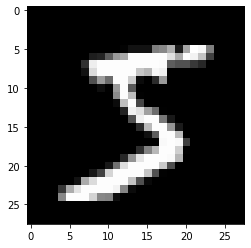

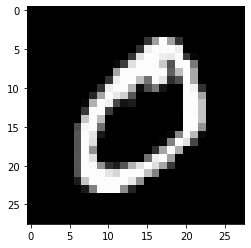

In [ ]:
# diplaying sample image..
for i in range(2):
    img = train_img[i].reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()

In [ ]:
#reshaping the images..
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)

In [ ]:
#after reshaping..
train_img.shape

(60000, 28, 28, 1)

In [ ]:
# one hot encoding
train_lab_one_hot = to_categorical(train_lab)
test_lab_one_hot = to_categorical(test_lab)
print(train_lab_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[[[-0.02075903  0.01718799  0.00096249 ...  0.01895802  0.00756839
    0.01122257]
  [-0.00607404  0.00293102 -0.01868626 ... -0.01917891 -0.00304916
   -0.01474806]
  [ 0.01201944  0.01208214 -0.01004745 ... -0.00554729 -0.00711249
    0.00797982]
  ...
  [ 0.01503674 -0.01151361 -0.0110783  ...  0.00241138 -0.018858
   -0.00905575]
  [-0.00283388 -0.01311871  0.01354489 ... -0.0142623   0.00559807
    0.00272038]
  [ 0.00997599 -0.01867162  0.0121243  ... -0.00145274 -0.00569494
   -0.01705644]]

 [[ 0.0208379  -0.01078504  0.01880594 ...  0.01661834 -0.00405436
   -0.00345852]
  [ 0.02135095  0.01193158 -0.00160294 ... -0.00575679 -0.00673147
   -0.02207915]
  [ 0.01904001 -0.01939553  0.02052272 ...  0.0155709  -0.00012736
   -0.01170779]
  ...
  [ 0.00589704 -0.00737817 -0.02035744 ... -0.02217144 -0.00930325
   -0.00163181]
  [-0.01959599 -0.01338112 -0.00667512 ... -0.0198771  -0.01636127
    0.00411111]
  [ 0.01077205 -0.02039316  0.0113005  ...  0.00268574  0.00591484
    0.01

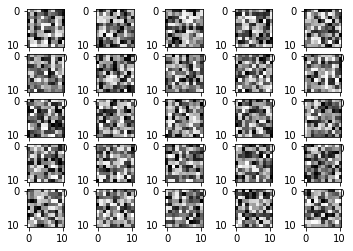

In [ ]:
#loading Alexnet Model..

AlexNet = Sequential()

#1st Convolutional Layer

x = Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(28,28,1))

AlexNet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


In [ ]:
#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 7, 7, 96)          11712     
_________________________________________________________________
batch_normalization_9 (Batch (None, 7, 7, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

In [ ]:
#Compiling Model
AlexNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = AlexNet.fit(train_img, train_lab_one_hot,
            validation_data=(test_img, test_lab_one_hot),
                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 13ms/step - loss: 0.5375 - accuracy: 0.8857 - val_loss: 0.3258 - val_accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1753 - accuracy: 0.9630 - val_loss: 0.0908 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1154 - accuracy: 0.9737 - val_loss: 0.4339 - val_accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0803 - accuracy: 0.9812 - val_loss: 0.0620 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0664 - accuracy: 0.9848 - val_loss: 0.0959 - val_accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0539 - accuracy: 0.9865 - val_loss: 0.0985 - val_accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0461 - accuracy: 0.9888 - val_loss: 0.0611 -

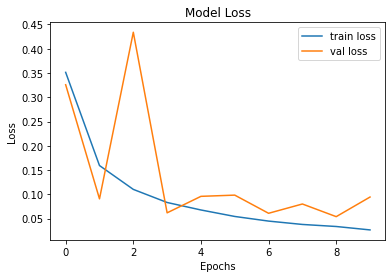

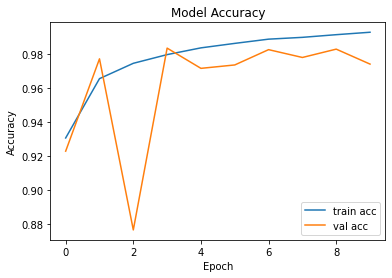

In [ ]:
# plot the model loss...
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the model accuracy...
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(AlexNet.evaluate(test_img, test_lab_one_hot))

313/313 [==============================] - 1s 5ms/step - loss: 0.0945 - accuracy: 0.9742
[0.09454202651977539, 0.9742000102996826]


In [ ]:
pred = AlexNet.predict(test_img[:10])


<Figure size 432x288 with 0 Axes>

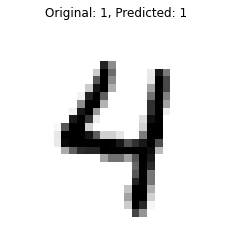

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing prediction

plt.imshow(test_img[27].reshape((28,28)), cmap='binary')
plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
plt.axis("Off")
plt.figure()

In [ ]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
